In [ ]:
!pip install mediapipe

In [ ]:
import mediapipe as mp
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
file = '/content/2.webp'

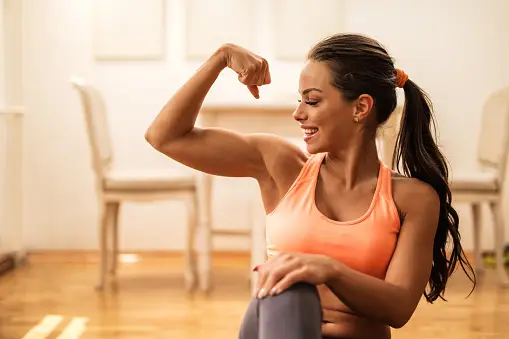

In [ ]:
img = cv2.imread(file)
cv2_imshow(img)
img.shape
img_angle = np.copy(img)

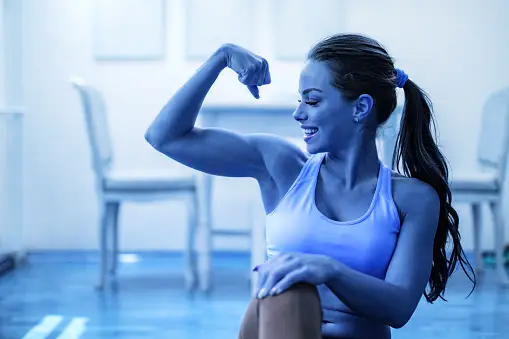

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img_gray)

In [ ]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

In [ ]:
mp = mp_pose.Pose(static_image_mode = True, min_detection_confidence= 0.5, min_tracking_confidence=0.5)

In [ ]:
results = mp.process(img_gray)

In [ ]:
print(results.pose_landmarks.landmark[0])
print(type(results.pose_landmarks.landmark[0]))

x: 0.605290412902832
y: 0.3419855237007141
z: -0.2637811005115509
visibility: 0.9993700385093689

<class 'mediapipe.framework.formats.landmark_pb2.NormalizedLandmark'>


In [ ]:
for lndmark in results.pose_landmarks.landmark:
  print(lndmark)

x: 0.605290412902832
y: 0.3419855237007141
z: -0.2637811005115509
visibility: 0.9993700385093689

x: 0.6239942312240601
y: 0.299746572971344
z: -0.27977004647254944
visibility: 0.9989838004112244

x: 0.6332384943962097
y: 0.2977888584136963
z: -0.279819518327713
visibility: 0.9992263317108154

x: 0.6440050005912781
y: 0.296278178691864
z: -0.28010639548301697
visibility: 0.9990217685699463

x: 0.6077471971511841
y: 0.2998185157775879
z: -0.2176065295934677
visibility: 0.9989284873008728

x: 0.6047970056533813
y: 0.29796767234802246
z: -0.21783411502838135
visibility: 0.9990811347961426

x: 0.6019694805145264
y: 0.2961888909339905
z: -0.2180539071559906
visibility: 0.9991207718849182

x: 0.693363606929779
y: 0.3133341670036316
z: -0.2249343991279602
visibility: 0.9991289973258972

x: 0.6314266920089722
y: 0.3031122088432312
z: 0.05748922377824783
visibility: 0.9994451403617859

x: 0.6249029636383057
y: 0.3971478044986725
z: -0.2342376708984375
visibility: 0.9992528557777405

x: 0.605733

In [ ]:
landmarks = results.pose_landmarks

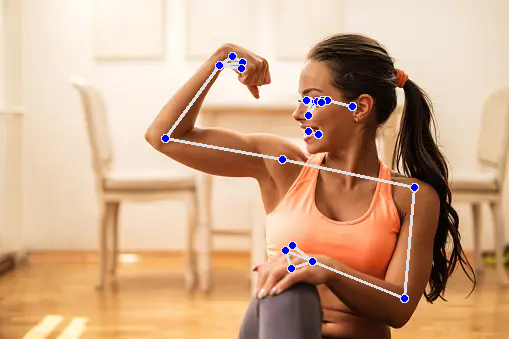

In [ ]:
mp_drawing.draw_landmarks(img, landmarks, mp_pose.POSE_CONNECTIONS,
                          mp_drawing.DrawingSpec((255,0,0), 2, 2))
cv2_imshow(img)

In [ ]:
shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER]
print(shoulder.x, shoulder.y)
shoulder_x = int(img.shape[1] * shoulder.x)
shoulder_y = int(img.shape[0] * shoulder.x)
shoulder_pos = [shoulder_x, shoulder_y]
print(shoulder_pos)


0.5542997121810913 0.4718429446220398
[282, 187]


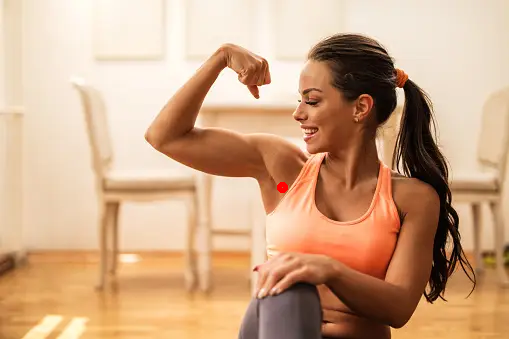

In [ ]:
cv2.circle(img_angle, (shoulder_x, shoulder_y), 3, (0,0,255), 3)
cv2_imshow(img_angle)

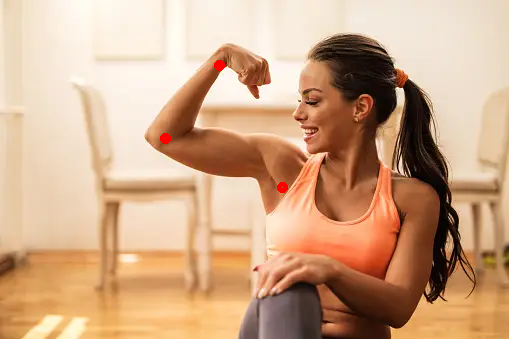

In [ ]:
wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST]
wrist_x = int(img.shape[1] * wrist.x)
wrist_y = int(img.shape[0] * wrist.y)
cv2.circle(img_angle, (wrist_x, wrist_y), 3, (0,0,255), 3, -1)

elbow = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW]
elbow_x = int(img.shape[1] * elbow.x)
elbow_y = int(img.shape[0] * elbow.y)
cv2.circle(img_angle, (elbow_x, elbow_y), 3, (0,0,255), 3, -1)

cv2_imshow(img_angle)

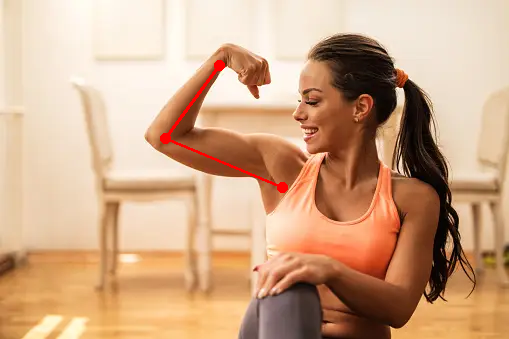

In [ ]:
cv2.line(img_angle, (wrist_x, wrist_y), (elbow_x, elbow_y), (0,0,255), 2)
cv2.line(img_angle, (shoulder_x, shoulder_y), (elbow_x, elbow_y), (0,0,255), 2)
cv2_imshow(img_angle)

In [ ]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)

    if angle >180.0:
        angle = 360-angle

    return angle

In [ ]:
shoulder_pos = [shoulder_x, shoulder_y]
elbow_pos = [ elbow_x,  elbow_y]
wrist_pos = [wrist_x, wrist_y]

In [ ]:
img2 = np.copy(img_angle)
img3 = np.copy(img_angle)

76


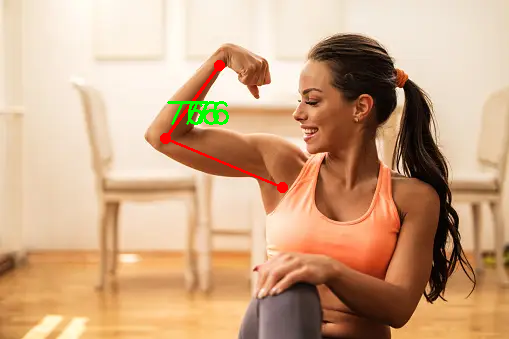

In [ ]:
angle = int(calculate_angle(shoulder_pos, elbow_pos,wrist_pos ))
print( angle)
cv2.putText(img_angle, str(angle), (elbow_x+25, elbow_y-15),  cv2.FONT_HERSHEY_SIMPLEX, 1,  (0, 255, 0),  2)

cv2_imshow(img_angle)